## Linear regression with Tensorflow

Create some random points in a 2D space and try to fit a straight line.

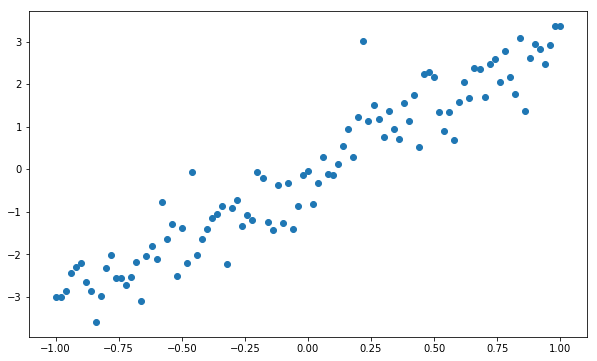

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

# create some random data
trainX = np.linspace(-1,1,101)
trainY = 3 * trainX + np.random.randn(*trainX.shape) * 0.6

plt.scatter(trainX, trainY)

In [2]:
# create placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [3]:
# w is the incline coefficient that needs to be learned. Initialise it to 0
w = tf.Variable(0.0, name='weight')

# y_model is the modeled straight line
y_model = tf.multiply(X, w)

# define the cost as the squared distance between the predicted (modeled) y_model and the actual value Y
cost = (tf.pow(Y - y_model, 2))

# use one of TF's optimizers (GradientDescent) to minimize the cost function. Learning rate is 0.01
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

We are done with the definitions of the graph. Now we need to initialise the variables and run some computations.

In [4]:
init = tf.global_variables_initializer()

# run a session. Go through 100 iterations to minimise the cost
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        for (x, y) in zip(trainX, trainY):
            sess.run(train_op, feed_dict={X: x, Y: y})
    coef = sess.run(w)
print(coef)

3.11344


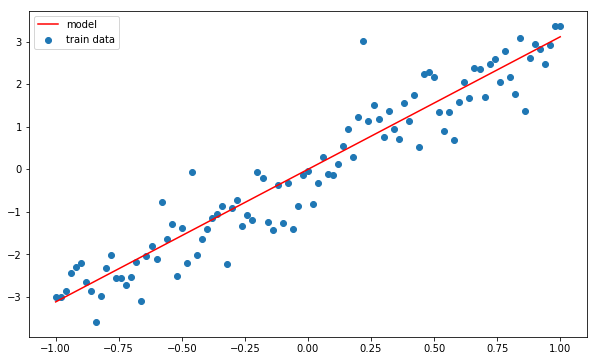

In [5]:
y_pred = trainX * coef

plt.scatter(trainX, trainY, label='train data')
plt.plot(trainX, y_pred, color='red', label='model')
plt.legend()

After the session has expired, all operations cease to exist. This is called _symbolic computation_.

In [6]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(w))

0.0


-----------

Let's try this out on a quadratic function.

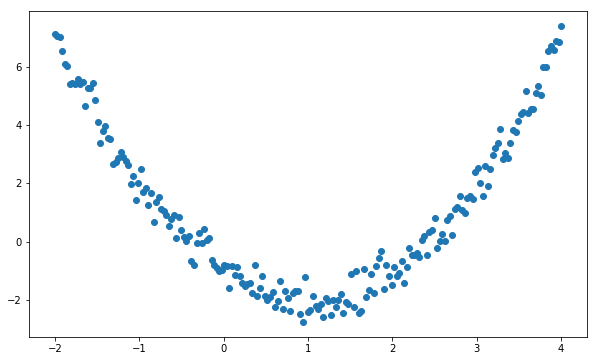

In [9]:
# Equation: (x-a)^2 + c

a = 1  # horizontal shift
b = -2  # vertical shift

trainx2 = np.linspace(-2,4,201)

noise = np.random.randn(*trainx2.shape) * 0.4
trainy2 = (trainx2 - a) ** 2 + b + noise

plt.scatter(trainx2, trainy2)

In [10]:
# create placeholders
X2 = tf.placeholder("float")
Y2 = tf.placeholder("float")

In [11]:
# w is the incline coefficient that needs to be learned. Initialise it to 0
w_a = tf.Variable(0.0, name='a')
w_b = tf.Variable(0.0, name='b')

# y_model is the modeled straight line
y_model2 = tf.square(X2 - w_a) + w_b

# define the cost as the squared distance between the predicted (modeled) y_model and the actual value Y
cost2 = (tf.pow(Y2 - y_model2, 2))

# use one of TF's optimizers (GradientDescent) to minimize the cost function. Learning rate is 0.01
train_op2 = tf.train.GradientDescentOptimizer(0.001).minimize(cost2)

In [12]:
init = tf.global_variables_initializer()

# run a session. Go through 100 iterations to minimise the cost
with tf.Session() as sess:
    sess.run(init)
    for i in range(200):
        for (x, y) in zip(trainx2, trainy2):
            sess.run(train_op2, feed_dict={X2: float(x), Y2: float(y)})
    a = sess.run(w_a)
    b = sess.run(w_b)

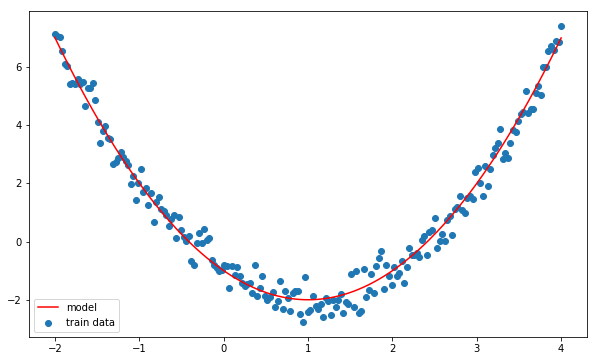

In [14]:
# create the model with the estimated values for a and b
y_pred2 = (trainx2 - a) ** 2 + b

plt.scatter(trainx2, trainy2, label='train data')
plt.plot(trainx2, y_pred2, color='red', label='model')
plt.legend()